# TenisIQ

Analisando o dataset: https://www.kaggle.com/datasets/gmadevs/atp-matches-dataset?resource=download

In these datasets there are individual csv files for ATP tournament from 2000 to 2017.

The numbers in the last columns are absolute values, using them you can calculate percentages.

* ace = absolute number of aces
* df = number of double faults
* svpt = total serve points
* 1stin = 1st serve in
* 1st won = points won on 1st serve
* 2ndwon = points won on 2nd serve
* SvGms = serve games
* bpSaved = break point saved
* bpFaced = break point faced

## **Importando os pacotes**

In [31]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kurtosis, skew
from prettytable import PrettyTable
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier


## **Importando os datasets**


Definindo cada planilha csv que se encontra dentro do zip no card do Trello e depois concatenando todos eles em um dataset só.

Além disso verificaremos se a concatenação foi feita da maneira correta com a soma das linas de todos os df, pondo todos eles em uma lista e utilizando o recurso shape.




In [32]:
#Definindo o dataframe:
data = pd.read_csv('data.csv')
df = pd.read_csv('data.csv')
dataIna = pd.read_csv('data.csv')

# **Pré-processamento**


## Removendo colunas que não agregam à análise

Seriam elas: tourney_id match_num winner_id loser_id winner_entry loser_entry tourney_date

In [33]:
cols_to_drop = ['tourney_id', 'match_num', 'winner_id', 'loser_id', 'winner_entry', 'loser_entry', 'tourney_date']

df = df.drop(columns=cols_to_drop)
data = data.drop(columns=cols_to_drop)

pd.set_option('display.max_columns', None)
df.head()
num_linhas = df.shape[0]
print(f"O dataset tem {num_linhas} linhas.")

O dataset tem 46965 linhas.


## Removendo colunas sobre o durante/pós jogo

In [34]:
colunas_para_remover = [
    "score", "minutes",
    "w_ace", "w_df", "w_svpt", "w_1stIn", "w_1stWon", "w_2ndWon", "w_SvGms", "w_bpSaved", "w_bpFaced",
    "l_ace", "l_df", "l_svpt", "l_1stIn", "l_1stWon", "l_2ndWon", "l_SvGms", "l_bpSaved", "l_bpFaced"
]

df = df.drop(columns=colunas_para_remover)
data = data.drop(columns=colunas_para_remover)

## Verificando as colunas

In [35]:
print(df.columns)
print(df.dtypes)

Index(['tourney_name', 'surface', 'draw_size', 'tourney_level', 'winner_seed',
       'winner_name', 'winner_hand', 'winner_ht', 'winner_ioc', 'winner_age',
       'winner_rank', 'winner_rank_points', 'loser_seed', 'loser_name',
       'loser_hand', 'loser_ht', 'loser_ioc', 'loser_age', 'loser_rank',
       'loser_rank_points', 'best_of', 'round'],
      dtype='object')
tourney_name           object
surface                object
draw_size               int64
tourney_level          object
winner_seed           float64
winner_name            object
winner_hand            object
winner_ht             float64
winner_ioc             object
winner_age            float64
winner_rank           float64
winner_rank_points    float64
loser_seed            float64
loser_name             object
loser_hand             object
loser_ht              float64
loser_ioc              object
loser_age             float64
loser_rank            float64
loser_rank_points     float64
best_of               float

## Verificar quantidade de valores nulos em cada coluna

In [36]:
import pandas as pd

# Contar valores nulos em cada coluna
null_values = df.isnull().sum()

# Total de linhas
total_linhas = len(df)

# Calcular a porcentagem de valores nulos
percentuais_nulos = (null_values / total_linhas) * 100

# Exibir valores nulos e suas porcentagens em ordem decrescente
print("Valores nulos por coluna e suas porcentagens:")
print(percentuais_nulos[percentuais_nulos > 0].sort_values(ascending=False))


Valores nulos por coluna e suas porcentagens:
loser_seed            77.674864
winner_seed           58.360481
loser_ht               9.338869
winner_ht              5.316725
loser_rank             3.283296
loser_rank_points      3.283296
winner_rank            1.937613
winner_rank_points     1.937613
surface                0.251251
loser_age              0.044714
loser_hand             0.031939
winner_age             0.023422
winner_hand            0.021292
dtype: float64


## Verificar quantidade de outliers em cada coluna

Aqui usaremos o método do intervalo interquartílico para verificar os outliers

In [37]:
# Total de linhas do DataFrame
total_linhas = len(df)

# Identificar outliers usando o método IQR
def identificar_outliers(coluna):
    Q1 = coluna.quantile(0.25)
    Q3 = coluna.quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    return coluna[(coluna < limite_inferior) | (coluna > limite_superior)]

# Calcular outliers para cada coluna numérica e sua porcentagem
outliers_info = {}
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    outliers = identificar_outliers(df[col])
    outliers_info[col] = (len(outliers) / total_linhas) * 100

    # Calcular a média da coluna
    media = df[col].mean()

    # Imputar a média nos outliers
    df.loc[(df[col] < outliers.min()) | (df[col] > outliers.max()), col] = media

# Exibir porcentagens de outliers
print("\nPorcentagens de outliers por coluna:")
for col, perc in outliers_info.items():
    if perc > 0:
        print(f"{col}: {perc:.2f}%")


Porcentagens de outliers por coluna:
draw_size: 16.22%
winner_seed: 3.24%
winner_ht: 1.44%
winner_age: 0.19%
winner_rank: 7.82%
winner_rank_points: 9.82%
loser_seed: 1.40%
loser_ht: 1.09%
loser_age: 0.12%
loser_rank: 10.11%
loser_rank_points: 7.19%
best_of: 23.90%


C:\Users\Diogo Marassi\AppData\Local\Temp\ipykernel_58920\2475451403.py:23: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '52.913169381454274' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[(df[col] < outliers.min()) | (df[col] > outliers.max()), col] = media


## Tratar outliers e valores nulos

In [38]:
# Imputar media em colunas numéricas nulas
for column in df.select_dtypes(include=['float64', 'int64']).columns:
  df[column].fillna(df[column].mean(), inplace=True)

# Remover linhas com colunas categóricas que contêm valores nulos
df = df.dropna(subset=df.select_dtypes(include=['object']).columns)


C:\Users\Diogo Marassi\AppData\Local\Temp\ipykernel_58920\815963246.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)


In [39]:
# Mostrar a quantidade de valores nulos por coluna novamente
null_values = df.isnull().sum()
null_values = null_values[null_values > 0]
print(null_values)

Series([], dtype: int64)


## Discretizar dados textuais

Aqui estamos discretizando os dados do tipo objeto

In [40]:
from sklearn.preprocessing import LabelEncoder

# Lista de colunas textuais/categóricas
textual_cols = df.select_dtypes(include=['object']).columns

# Usar Label Encoding para transformar colunas categóricas
label_encoder = LabelEncoder()

for col in textual_cols:
    df[col] = label_encoder.fit_transform(df[col].astype(str))

df.head()


,tourney_name,surface,draw_size,tourney_level,winner_seed,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,winner_rank,winner_rank_points,loser_seed,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,loser_rank,loser_rank_points,best_of,round
0,1237,1,52.913169,0,8.629875,108,1,185.0,33,27.181383,82.287222,1521.166931,8.838722,136,1,180.0,4,24.035592,122.328182,899.81844,3.47793,5
1,1237,1,52.913169,0,8.629875,335,1,183.0,16,19.756331,352.000000,1521.166931,10.075422,253,1,173.0,77,23.843943,122.328182,899.81844,3.47793,5
2,1237,1,52.913169,0,8.629875,918,1,185.0,91,20.881588,82.287222,1521.166931,10.075422,1578,1,183.0,16,27.011636,122.328182,899.81844,3.47793,5
3,1237,1,52.913169,0,8.629875,516,0,183.0,68,30.047912,82.287222,1521.166931,8.838722,923,1,196.0,103,23.260780,122.328182,899.81844,3.47793,5
4,1237,1,52.913169,0,7.244682,525,1,185.0,4,30.075291,82.287222,1521.166931,10.075422,60,1,175.0,32,29.423682,122.328182,899.81844,3.47793,5


## Normalizar os dados

Converter dados para float e normaliza-los entre 0 e 1

In [41]:
from sklearn.preprocessing import MinMaxScaler

# Converter todas as colunas numéricas para float, ignorando as categóricas
for col in df.columns:
    if df[col].dtype == 'object':
        try:
            df[col] = df[col].astype(float)
        except ValueError:
            # Manter como está se não puder ser convertido
            continue

# Selecionar apenas colunas numéricas para normalizar
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Remover a coluna 'winner_name' da lista de colunas numéricas
numeric_cols = numeric_cols.drop('winner_name')

# Inicializar o normalizador Min-Max
scaler = MinMaxScaler()

# Aplicar o normalizador
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Verificar as primeiras linhas dos dados normalizados
df.head()


,tourney_name,surface,draw_size,tourney_level,winner_seed,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,winner_rank,winner_rank_points,loser_seed,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,loser_rank,loser_rank_points,best_of,round
0,0.964899,0.333333,0.0,0.0,0.053783,108,0.5,0.488889,0.326733,0.479505,0.000000,0.0,0.000000,0.073276,0.5,0.377778,0.037037,0.316640,0.0,0.0,0.0,0.625
1,0.964899,0.333333,0.0,0.0,0.053783,335,0.5,0.444444,0.158416,0.168995,0.133606,0.0,0.049151,0.136315,0.5,0.222222,0.712963,0.310100,0.0,0.0,0.0,0.625
2,0.964899,0.333333,0.0,0.0,0.053783,918,0.5,0.488889,0.900990,0.216052,0.000000,0.0,0.049151,0.850216,0.5,0.444444,0.148148,0.418201,0.0,0.0,0.0,0.625
3,0.964899,0.333333,0.0,0.0,0.053783,516,0.0,0.444444,0.673267,0.599382,0.000000,0.0,0.000000,0.497306,0.5,0.733333,0.953704,0.290199,0.0,0.0,0.0,0.625
4,0.964899,0.333333,0.0,0.0,0.000000,525,0.5,0.488889,0.039604,0.600527,0.000000,0.0,0.049151,0.032328,0.5,0.266667,0.296296,0.500514,0.0,0.0,0.0,0.625


# Análise exploratória dos dados

## Análise das idades de vencedores e perdedores


In [42]:
# Calcular as estatísticas
stats_table = PrettyTable()
stats_table.field_names = ["Estatística", "Winner_Age", "Loser_Age"]

mean_winner_age, mean_loser_age = df['winner_age'].mean(), df['loser_age'].mean()
median_winner_age, median_loser_age = df['winner_age'].median(), df['loser_age'].median()
mode_winner_age, mode_loser_age = round(df['winner_age'].mode()[0], 2), round(df['loser_age'].mode()[0], 2)
skewness_winner_age, skewness_loser_age = skew(df['winner_age']), skew(df['loser_age'])
kurt_winner_age, kurt_loser_age = kurtosis(df['winner_age']), kurtosis(df['loser_age'])

# Adicionando os valores à tabela
stats_table.add_row(["Média", round(mean_winner_age, 2), round(mean_loser_age, 2)])
stats_table.add_row(["Mediana", round(median_winner_age, 2), round(median_loser_age, 2)])
stats_table.add_row(["Moda", round(mode_winner_age, 2), round(mode_loser_age, 2)])
stats_table.add_row(["Simetria", round(skewness_winner_age, 2), round(skewness_loser_age, 2)])
stats_table.add_row(["Curtose", round(kurt_winner_age, 2), round(kurt_loser_age, 2)])

# Mostrar a tabela formatada
print(stats_table)

+-------------+------------+-----------+
| Estatística | Winner_Age | Loser_Age |
+-------------+------------+-----------+
|    Média    |    0.43    |    0.39   |
|   Mediana   |    0.42    |    0.38   |
|     Moda    |    0.34    |    0.35   |
|   Simetria  |    0.16    |    0.09   |
|   Curtose   |   -0.36    |   -0.35   |
+-------------+------------+-----------+


## Análise dos breaking points dos perdedores e vencedores

In [43]:
df_boxplot = dataIna[['w_bpSaved', 'winner_rank']].copy()

Index(['w_bpSaved', 'winner_rank'], dtype='object')


Text(1, 3.3, 'Mediana: 3.0')

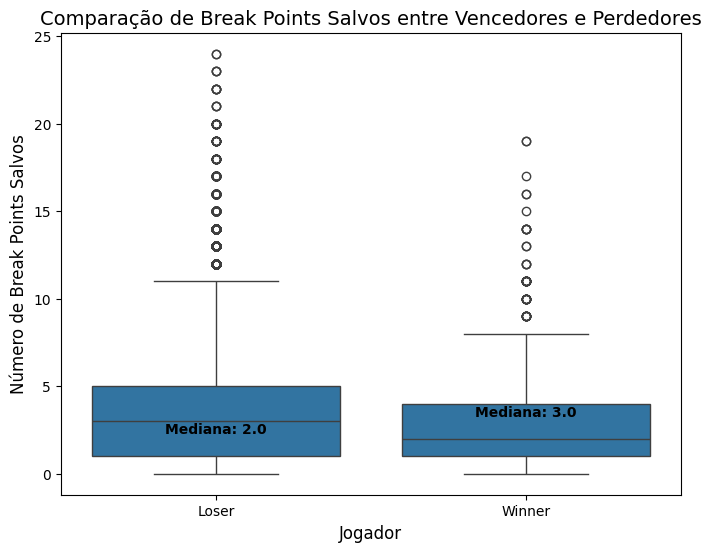

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Verificar colunas do DataFrame
print(df_boxplot.columns)

# Criando o boxplot colorido e estilizado
plt.figure(figsize=(8, 6))

# Definindo uma paleta de cores
colors = ['#1f77b4', '#ff7f0e']

# Assuming 'winner_rank' represents the player type (winner/loser)
# You might need to adjust this based on your data
# Create a new column 'Tipo' based on 'winner_rank'
# For example, if winner_rank is 1 for winners and 2 for losers:
df_boxplot['Tipo'] = df_boxplot['winner_rank'].apply(lambda x: 'Winner' if x == 1 else 'Loser')
# Modify the condition if 'winner_rank' has different values for winners and losers

# Criando o boxplot using 'w_bpSaved' as the y-axis variable
# This assumes 'w_bpSaved' represents the number of break points saved
# If it's a different column, replace 'w_bpSaved' with the correct column name
sns.boxplot(x='Tipo', y='w_bpSaved', data=df_boxplot)

# Melhorar o título e rótulos
plt.title('Comparação de Break Points Salvos entre Vencedores e Perdedores', fontsize=14) # Changed title to reflect break points saved
plt.xlabel('Jogador', fontsize=12)
plt.ylabel('Número de Break Points Salvos', fontsize=12) # Changed y-axis label to reflect break points saved

# Adicionar anotação para as medianas
# Changed 'Aces' to 'w_bpSaved' to match the existing column
median_winner = df_boxplot[df_boxplot['Tipo'] == 'Winner']['w_bpSaved'].median()
median_loser = df_boxplot[df_boxplot['Tipo'] == 'Loser']['w_bpSaved'].median()

plt.text(0, median_winner + 0.3, f'Mediana: {median_winner}', horizontalalignment='center', color='black', weight='semibold')
plt.text(1, median_loser + 0.3, f'Mediana: {median_loser}', horizontalalignment='center', color='black', weight='semibold')

## Comparação de Aces entre Vencedores e Perdedores

C:\Users\Diogo Marassi\AppData\Local\Temp\ipykernel_58920\3338434873.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Tipo', y='Aces', data=df_boxplot, palette=colors)


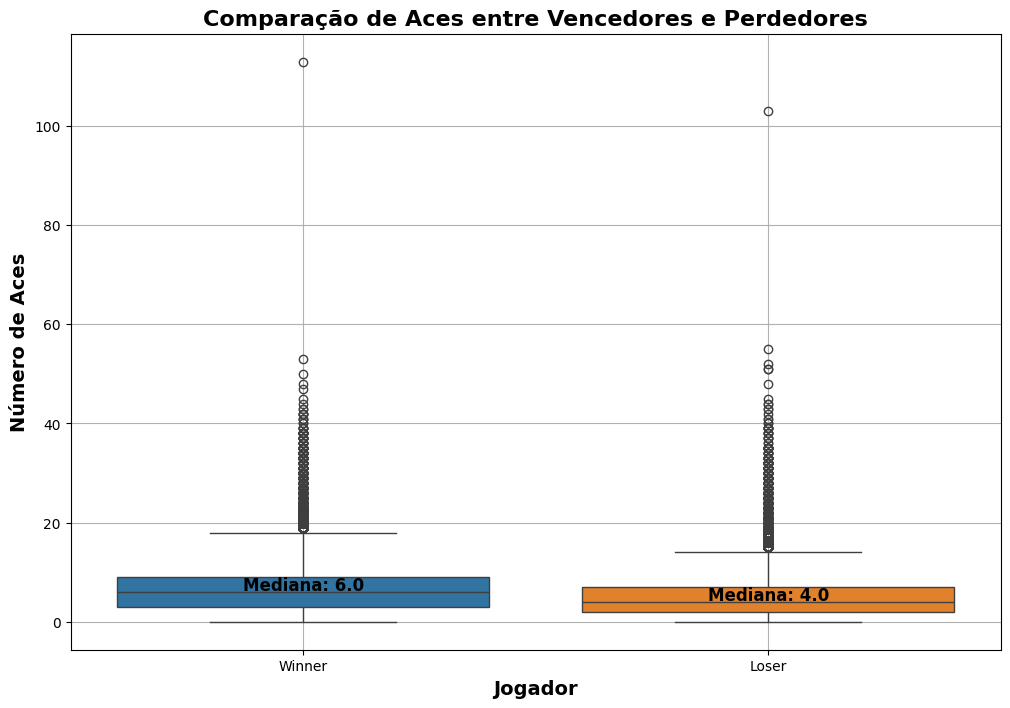

In [45]:
# Criando o boxplot colorido e estilizado
plt.figure(figsize=(12, 8))

# Definindo uma paleta de cores
colors = ['#1f77b4', '#ff7f0e']

# Creating a new DataFrame with the required columns and a 'Tipo' column
# to distinguish between winners and losers.
df_boxplot = dataIna[['w_ace', 'winner_rank', 'l_ace', 'loser_rank']].copy()
df_boxplot = pd.melt(df_boxplot, id_vars=[], value_vars=['w_ace', 'l_ace'], var_name='Tipo', value_name='Aces')
df_boxplot['Tipo'] = df_boxplot['Tipo'].replace({'w_ace': 'Winner', 'l_ace': 'Loser'})

sns.boxplot(x='Tipo', y='Aces', data=df_boxplot, palette=colors)

# Melhorar o título e rótulos
plt.title('Comparação de Aces entre Vencedores e Perdedores', fontsize=16, weight='bold')
plt.xlabel('Jogador', fontsize=14, weight='semibold')
plt.ylabel('Número de Aces', fontsize=14, weight='semibold')

# Adicionar anotação para as medianas
median_winner = df_boxplot[df_boxplot['Tipo'] == 'Winner']['Aces'].median()
median_loser = df_boxplot[df_boxplot['Tipo'] == 'Loser']['Aces'].median()

plt.text(0, median_winner + 0.3, f'Mediana: {round(median_winner, 2)}', horizontalalignment='center', fontsize=12, color='black', weight='semibold')
plt.text(1, median_loser + 0.3, f'Mediana: {round(median_loser, 2)}', horizontalalignment='center', fontsize=12, color='black', weight='semibold')

# Exibir o grid para facilitar a leitura
plt.grid(True)

plt.show()

## Distribuição das *idades*

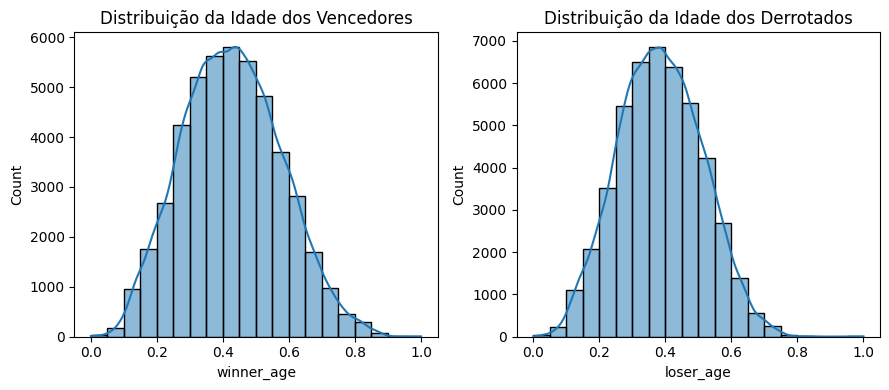

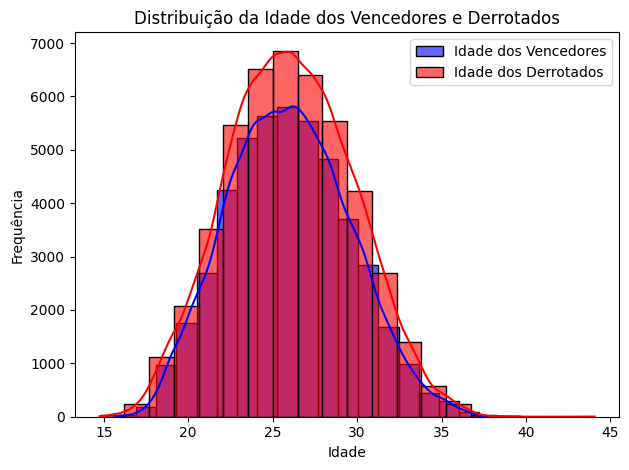

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma para a idade dos vencedores e derrotados
plt.figure(figsize=(9, 4))
plt.subplot(1, 2, 1)
sns.histplot(df['winner_age'], bins=20, kde=True)
plt.title('Distribuição da Idade dos Vencedores')

plt.subplot(1, 2, 2)
sns.histplot(df['loser_age'], bins=20, kde=True)
plt.title('Distribuição da Idade dos Derrotados')

plt.tight_layout()
plt.show()

# Criar o gráfico
sns.histplot(data['winner_age'], bins=20, kde=True, color='blue', label='Idade dos Vencedores', alpha=0.6)
sns.histplot(data['loser_age'], bins=20, kde=True, color='red', label='Idade dos Derrotados', alpha=0.6)

# Adicionar títulos e rótulos
plt.title('Distribuição da Idade dos Vencedores e Derrotados')
plt.xlabel('Idade')
plt.ylabel('Frequência')

# Adicionar a legenda
plt.legend()

# Ajustar layout
plt.tight_layout()
plt.show()

In [47]:
media_idade_vencedores = data['winner_age'].mean()
media_idade_perdedores = data['loser_age'].mean()
print("Media de idade dos vencedores: " + str(media_idade_vencedores))
print("Media de idade dos perdedores: " + str(media_idade_perdedores))

Media de idade dos vencedores: 25.95091466309664
Media de idade dos perdedores: 26.049997387190768


## Distribuição das alturas

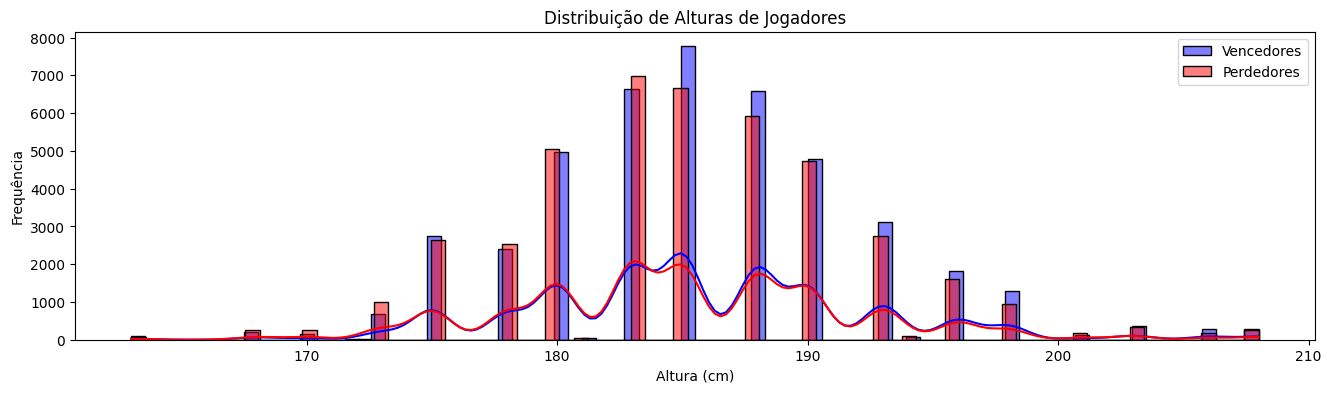

In [48]:
plt.figure(figsize=(16, 4))
sns.histplot(data=data, x='winner_ht', color='blue', label='Vencedores', kde=True)
sns.histplot(data=data, x='loser_ht', color='red', label='Perdedores', kde=True)
plt.xlabel('Altura (cm)')
plt.ylabel('Frequência')
plt.title('Distribuição de Alturas de Jogadores')
plt.legend()
plt.show()

In [49]:
# prompt: Procure na altura dos jogadores todos que tem menos de 50cm

# Procure na altura dos jogadores todos que tem menos de 50cm
jogadores_baixos = data[(data['winner_ht'] < 50) | (data['loser_ht'] < 50)]

# Exiba os jogadores com altura menor que 50cm
print(jogadores_baixos[['winner_ht', 'loser_ht']])

Empty DataFrame
Columns: [winner_ht, loser_ht]
Index: []


## Distribuição de rankings

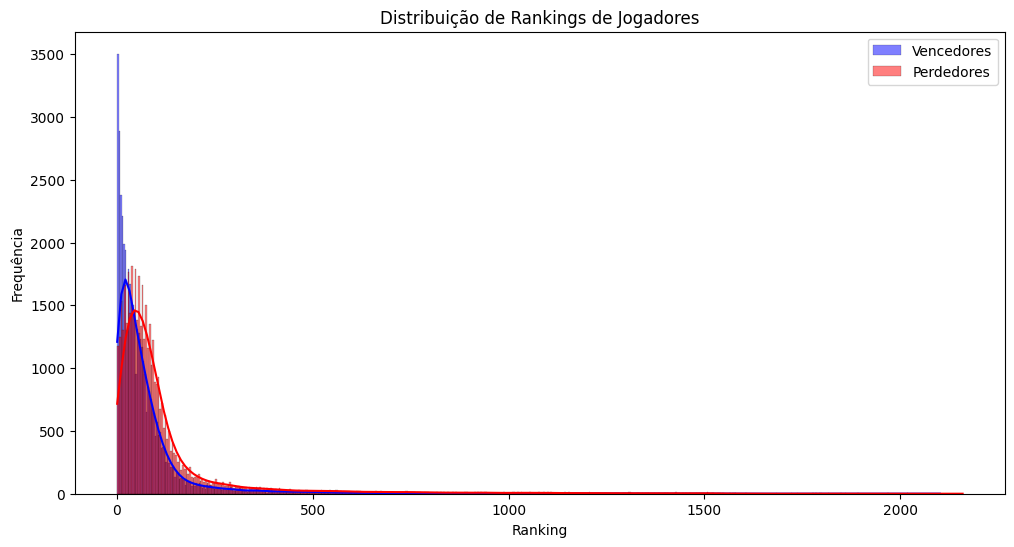

In [50]:
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='winner_rank', color='blue', label='Vencedores', kde=True)
sns.histplot(data=data, x='loser_rank', color='red', label='Perdedores', kde=True)
plt.xlabel('Ranking')
plt.ylabel('Frequência')
plt.title('Distribuição de Rankings de Jogadores')
plt.legend()
plt.show()

## Exibição das diferentes superfícies

Isso mostra um desbalanceamento dessa coluna que deverá ser tratado

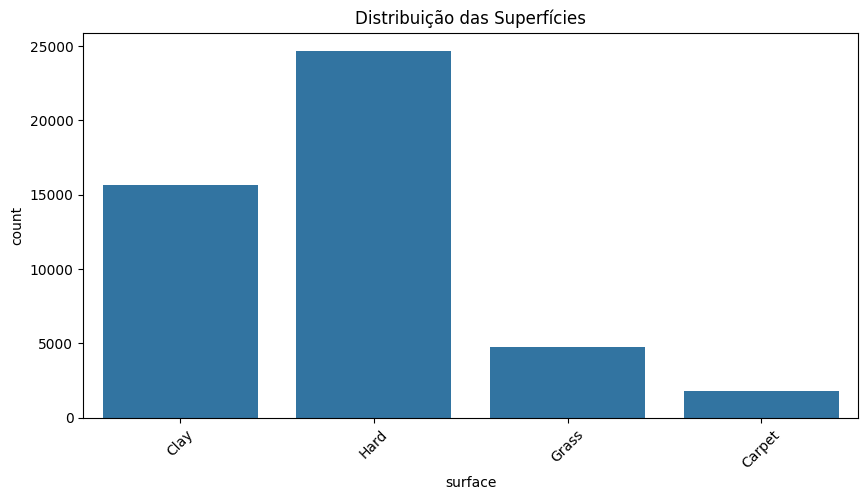

In [51]:
# Contagem de ocorrências de diferentes superfícies
plt.figure(figsize=(10, 5))
sns.countplot(data=data, x='surface')
plt.title('Distribuição das Superfícies')
plt.xticks(rotation=45)
plt.show()


## Destros x Canhotos

Nota-se um desbalanceamento muito grande que deverá ser tratado


C:\Users\Diogo Marassi\AppData\Local\Temp\ipykernel_58920\635183730.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='winner_hand', data=data, palette='pastel')


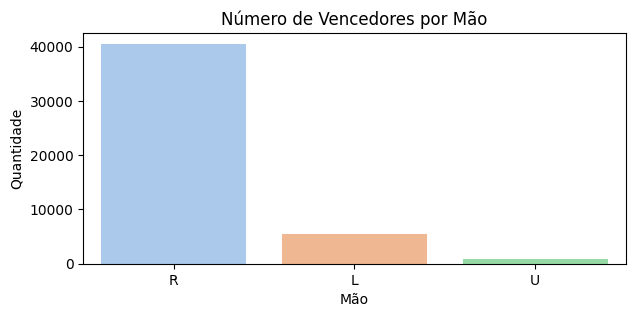

C:\Users\Diogo Marassi\AppData\Local\Temp\ipykernel_58920\635183730.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='loser_hand', data=data, palette='pastel')


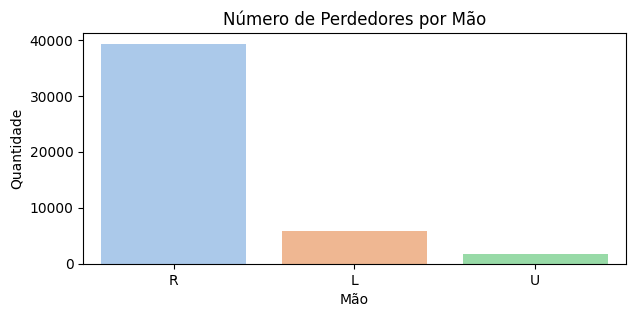

In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supondo que seus dados estão em um DataFrame chamado 'df'

# Contando a quantidade de vencedores destros e canhotos
vencedores = data[data['winner_hand'].isin(['R', 'L'])]

# Contando a quantidade de perdedores destros e canhotos
perdedores = data[data['loser_hand'].isin(['R', 'L'])]

# Criando um gráfico de barras para os vencedores
plt.figure(figsize=(7, 3))
sns.countplot(x='winner_hand', data=data, palette='pastel')
plt.title('Número de Vencedores por Mão')
plt.xlabel('Mão')
plt.ylabel('Quantidade')
plt.show()

# Criando um gráfico de barras para os perdedores
plt.figure(figsize=(7, 3))
sns.countplot(x='loser_hand', data=data, palette='pastel')
plt.title('Número de Perdedores por Mão')
plt.xlabel('Mão')
plt.ylabel('Quantidade')
plt.show()

# Implementação do Random Forest

A ideia é fazer uma classificação categórica para determinar o vencedor.
Nesse caso, terão 3 colunas principais:
* Vencedor, Perderdor, e VencedorTarget.
* Os nomes dos vencedores/perdedores serão mapeados para um número, enquanto a VencedorTarget será a predita (dropada no treino).

Ideias posteriores:
* Aumentar o dataset com dados de bets, e ajustar o peso para prever melhor.
* Prever número de Aces
* Prever tempo do jogo, ou algo que aconteceria no jogo


Mas antes, vamos entender como ficaram os datasets:

In [53]:
def exibir_info_organizada(datasets, nomes):
    for df, nome in zip(datasets, nomes):
        print(f"Dataset: {nome}")
        print(f"{'Colunas':<20}: {', '.join(df.columns[:5])} ...")  # Mostra até 5 colunas para não poluir
        print(f"{'Número de linhas':<20}: {len(df)}")
        print(f"{'Primeiras linhas':<20}:\n{df.head().to_string(index=False)}\n")
        print("-" * 80)

# Supondo que os datasets 'data', 'df' e 'dataIna' já estejam carregados
# Exibindo as informações de forma organizada
datasets = [data, df, dataIna]
nomes = ['data', 'df', 'dataIna']

# Chamando a função
exibir_info_organizada(datasets, nomes)

Dataset: data
Colunas             : tourney_name, surface, draw_size, tourney_level, winner_seed ...
Número de linhas    : 46965
Primeiras linhas    :
tourney_name surface  draw_size tourney_level  winner_seed         winner_name winner_hand  winner_ht winner_ioc  winner_age  winner_rank  winner_rank_points  loser_seed       loser_name loser_hand  loser_ht loser_ioc  loser_age  loser_rank  loser_rank_points  best_of round
     Orlando    Clay         32             A          NaN       Antony Dupuis           R      185.0        FRA   27.181383        113.0               351.0         1.0      Andrew Ilie          R     180.0       AUS  24.035592        50.0              762.0      3.0   R32
     Orlando    Clay         32             A          NaN   Fernando Gonzalez           R      183.0        CHI   19.756331        352.0                76.0         NaN     Cecil Mamiit          R     173.0       PHI  23.843943       139.0              280.0      3.0   R32
     Orlando    Clay    

## Treinamento do modelo

In [54]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [55]:
# Separar features e target
X = df.drop(['winner_name'], axis=1)
y = df['winner_name']

# Padronizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Codificar os rótulos (se necessário)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


In [56]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

In [57]:
# Instanciar o modelo
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Treinar o modelo
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Métricas do modelo

In [58]:
# Fazer previsões no conjunto de teste
y_pred = rf_model.predict(X_test)

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia: {accuracy * 100:.2f}%')

# Outras métricas
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Acurácia: 83.56%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         1
           2       0.12      1.00      0.22         1
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         1
          10       0.81      1.00      0.89        17
          11       0.00      0.00      0.00         1
          12       1.00      0.50      0.67         4
          13       0.25      0.40      0.31         5
          15       0.50      0.69      0.58        32
          16       0.00      0.00      0.00         1
          17       1.00      0.67      0.80         3
          20       1.00      1.00      1.00         1
          21       0.52      0.60      0.56        20
          22       0.80      0.79      0.80        47
          

c:\Users\Diogo Marassi\Desktop\tennisIQ\ENG4040-PROJETO\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Diogo Marassi\Desktop\tennisIQ\ENG4040-PROJETO\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Diogo Marassi\Desktop\tennisIQ\ENG4040-PROJETO\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(a

### Problema identificado

O modelo está prevendo bem apenas algumas classes, por exemplo:

Classe 0 (primeira linha):

* Precision (Precisão): 0.00 → O modelo não fez nenhuma previsão correta para esse vencedor. Ou seja, quando o modelo previu "Classe 0" como o vencedor, ele estava sempre errado.
* Recall (Revocação): 0.00 → O modelo não conseguiu prever corretamente o único exemplo de "Classe 0" que estava no conjunto de teste.
* F1-Score: 0.00 → Como tanto a precisão quanto o recall são zero, o F1-Score também é zero.
* Support: 1 → Havia apenas 1 exemplo de "Classe 0" no conjunto de dados de teste.

Classe 22 (quinta linha):

* Precision: 0.80 → 80% das previsões feitas para "Classe 22" estavam corretas.
* Recall: 0.79 → O modelo conseguiu identificar corretamente 79% dos vencedores reais da "Classe 22".
* F1-Score: 0.80 → Reflete o equilíbrio entre precisão e recall, com um desempenho geral bom para essa classe.
* Support: 47 → Havia 47 partidas onde o vencedor real era da "Classe 22".

### Possiveis soluções

* Rebalancear os dados: Se algumas classes têm muito mais exemplos do que outras, podemos tentar balancear o conjunto de dados:

    - Aumentar o número de exemplos da classe minoritária (usando técnicas de superamostragem, como SMOTE).
    - Reduzir o número de exemplos da classe majoritária (subamostragem).
    - Atribuir pesos às classes: Ao treinar o modelo, você pode atribuir mais peso às classes minoritárias (menos frequentes), forçando o modelo a prestar mais atenção a essas classes. Em modelos como Random Forest, você pode usar o parâmetro class_weight='balanced' para equilibrar as previsões.

* Ajuste de hiperparâmetros: Melhorar o desempenho do modelo pode envolver ajustar os hiperparâmetros (como o número de árvores no Random Forest, profundidade máxima, etc.). Usar técnicas como GridSearchCV ou RandomizedSearchCV para encontrar os melhores hiperparâmetros pode aumentar a precisão global.

## Verificando desbalanceamento

In [61]:
df

,tourney_name,surface,draw_size,tourney_level,winner_seed,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,winner_rank,winner_rank_points,loser_seed,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,loser_rank,loser_rank_points,best_of,round
0,0.964899,0.333333,0.0,0.0,0.053783,108,0.5,0.488889,0.326733,0.479505,0.000000,0.0,0.000000,0.073276,0.5,0.377778,0.037037,0.316640,0.0,0.0,0.0,0.625
1,0.964899,0.333333,0.0,0.0,0.053783,335,0.5,0.444444,0.158416,0.168995,0.133606,0.0,0.049151,0.136315,0.5,0.222222,0.712963,0.310100,0.0,0.0,0.0,0.625
2,0.964899,0.333333,0.0,0.0,0.053783,918,0.5,0.488889,0.900990,0.216052,0.000000,0.0,0.049151,0.850216,0.5,0.444444,0.148148,0.418201,0.0,0.0,0.0,0.625
3,0.964899,0.333333,0.0,0.0,0.053783,516,0.0,0.444444,0.673267,0.599382,0.000000,0.0,0.000000,0.497306,0.5,0.733333,0.953704,0.290199,0.0,0.0,0.0,0.625
4,0.964899,0.333333,0.0,0.0,0.000000,525,0.5,0.488889,0.039604,0.600527,0.000000,0.0,0.049151,0.032328,0.5,0.266667,0.296296,0.500514,0.0,0.0,0.0,0.625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46960,0.702808,0.333333,0.0,0.4,0.053783,157,0.5,0.503177,0.207921,0.130295,0.000000,0.0,0.049151,0.912716,0.0,0.555556,0.129630,0.441932,0.0,0.0,1.0,0.875
46961,0.755070,1.000000,0.0,0.4,0.053783,766,0.0,0.600000,0.871287,0.437486,0.000000,0.0,0.049151,0.649246,0.5,0.488889,0.722222,0.573951,0.0,0.0,1.0,0.875
46962,0.755070,1.000000,0.0,0.4,0.053783,541,0.5,0.888889,0.752475,0.381383,0.000000,0.0,0.049151,0.706897,0.5,0.492495,0.842593,0.352518,0.0,0.0,1.0,0.875
46963,0.755070,1.000000,0.0,0.4,0.053783,766,0.0,0.600000,0.871287,0.437486,0.000000,0.0,0.049151,0.432651,0.5,0.888889,0.722222,0.343922,0.0,0.0,1.0,0.875


In [59]:
winner_distribution = df['winner_name'].value_counts()
print(winner_distribution)

unique_winners_count = df['winner_name'].nunique()
print(unique_winners_count)

winner_name
1018    974
970     760
893     695
239     642
101     556
       ... 
366       1
48        1
682       1
1168      1
561       1
Name: count, Length: 1253, dtype: int64
1253


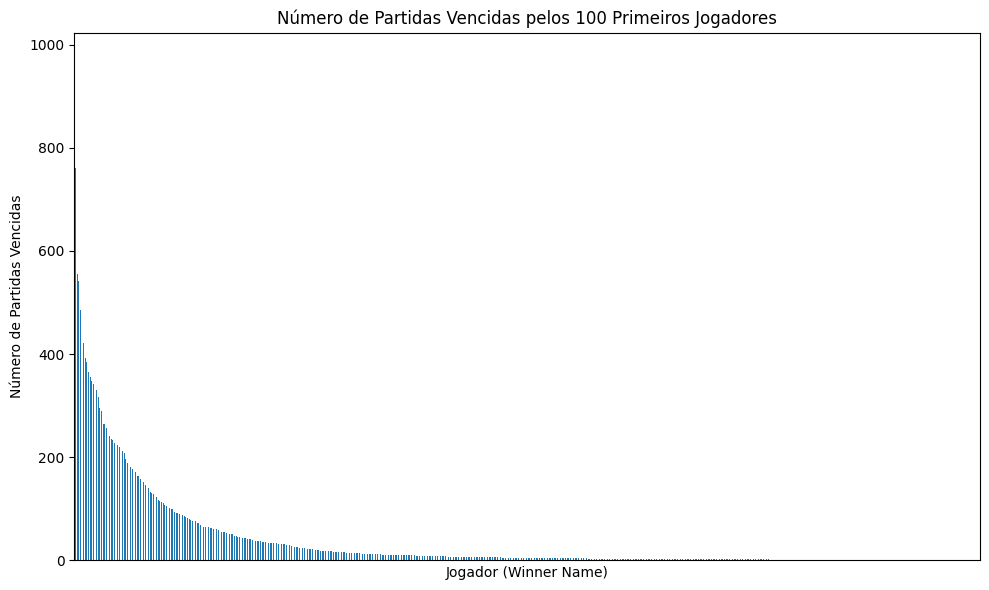

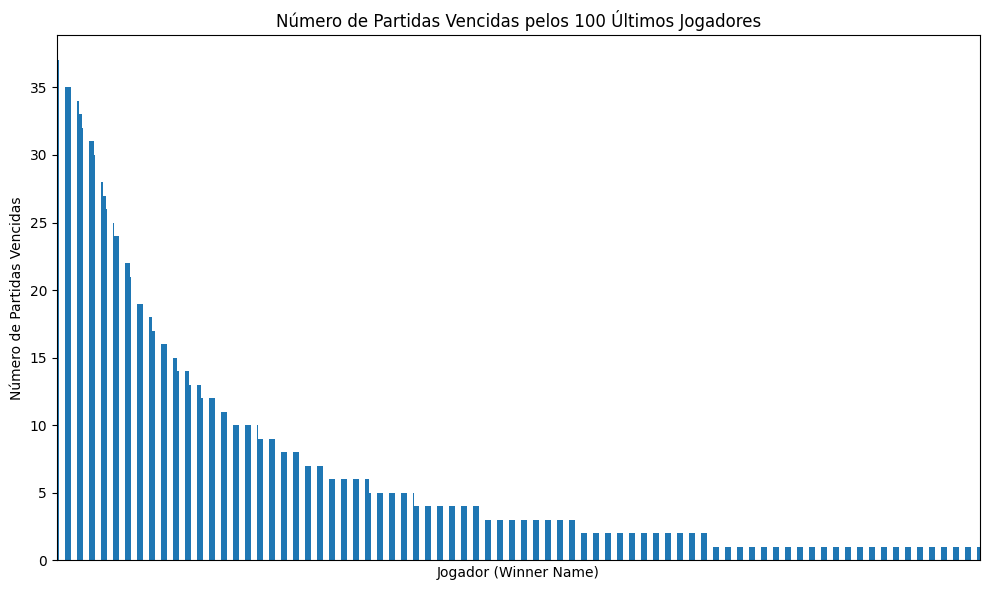

In [65]:
import matplotlib.pyplot as plt

# Verificando a quantidade de partidas vencidas por cada jogador
winner_distribution = df['winner_name'].value_counts()

# Gráfico para os 100 primeiros jogadores (com mais vitórias)
plt.figure(figsize=(10, 6))
winner_distribution.plot(kind='bar')
plt.title('Número de Partidas Vencidas pelos 100 Primeiros Jogadores')
plt.xlabel('Jogador (Winner Name)')
plt.ylabel('Número de Partidas Vencidas')
plt.xticks([], []) 
plt.tight_layout()
plt.show()

# Gráfico para os 100 últimos jogadores (com menos vitórias)
plt.figure(figsize=(10, 6))
winner_distribution.tail(1000).plot(kind='bar')
plt.title('Número de Partidas Vencidas pelos 100 Últimos Jogadores')
plt.xlabel('Jogador (Winner Name)')
plt.ylabel('Número de Partidas Vencidas')
plt.xticks([], []) 
plt.tight_layout()
plt.show()
